## Transport SQRB Example

In [ ]:
from solarium.benchmarks import Transport_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim
from pecos_selene import qsystem_model_alpha # requires pecos_selene

In [4]:
# select parameters and build experiment

n_qubits = 16
seq_lengths = [8, 32, 128]
seq_reps = 10
filename = 'exp_transport_SQRB_example.p'

qubit_transport_depths = {
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 2,
    7: 2,
    8: 4,
    9: 4,
    10: 4,
    11: 4,
    12: 8,
    13: 8,
    14: 8,
    15: 8
}

exp = Transport_SQRB_Experiment(n_qubits, seq_lengths, seq_reps, qubit_transport_depths, filename=filename)
#exp.options['measure_leaked'] = True # False by default
exp.add_settings()

In [ ]:
# or load an existing experiment from working directory

filename = 'exp_transport_SQRB_example.p'
exp = Transport_SQRB_Experiment.load(filename)

Having setup our transport SQRB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [4]:
# Setup simple error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [5]:
# Or use hardware realistic noise model

error_model = qsystem_model_alpha(random_seed=123)

C:\Users\karl.mayer\AppData\Local\anaconda3\envs\guppy_env\Lib\site-packages\pecos_selene\error_models\named.py:30: UserWarning: 


* There is no crosstalk noise on measurements and reset.

* The noise parameter values are rough estimates, using a combination of target values for Helios and values from H2's model. These have not been verified by tomography experiments on the device.

* Anduril (the component that decides ion transport) does not currently report accurate timing estimates. This affects the memory error.

  warnings.warn(msg)


In [6]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/30 circuits complete
2/30 circuits complete
3/30 circuits complete
4/30 circuits complete
5/30 circuits complete
6/30 circuits complete
7/30 circuits complete
8/30 circuits complete
9/30 circuits complete
10/30 circuits complete
11/30 circuits complete
12/30 circuits complete
13/30 circuits complete
14/30 circuits complete
15/30 circuits complete
16/30 circuits complete
17/30 circuits complete
18/30 circuits complete
19/30 circuits complete
20/30 circuits complete
21/30 circuits complete
22/30 circuits complete
23/30 circuits complete
24/30 circuits complete
25/30 circuits complete
26/30 circuits complete
27/30 circuits complete
28/30 circuits complete
29/30 circuits complete
30/30 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      PTbSpK                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=PTbSpKQWNwtLyHty48it0i1UbQVVlSWbbkN14Gq7k_14wZLRrt1Kypx_jNpaeTAqn9Ebf2iBn_--hgcbSc2Sng
✅ Successfully logged in as karl.mayer@quantinuum.com using the browser.


In [5]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='transport-SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [6]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [11]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 5, 28, 17, 13, 6, 26862, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 5, 28, 16, 51, 32, 836542, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 5, 28, 16, 52, 4, 993776, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [12]:
# retrieve results (once execution job has completed)

exp.retrieve(execute_job_ref)

### Analyze experiment results

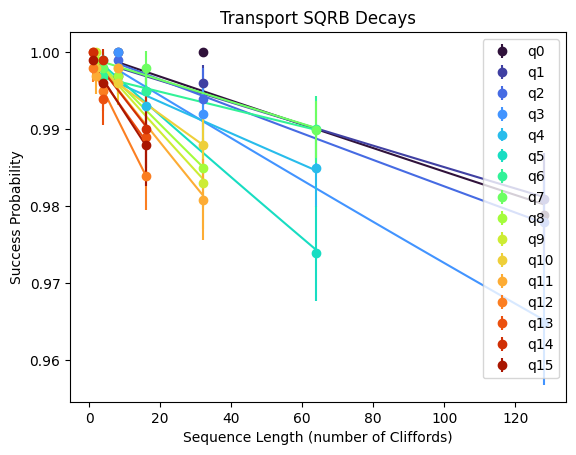

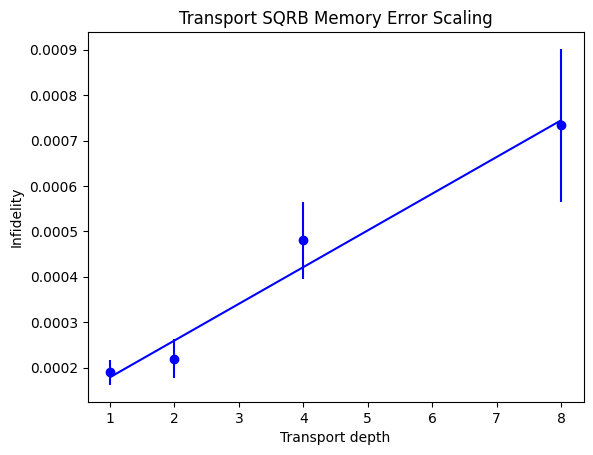

Depth-1 Linear Memory Error:
8e-05 +/- 2e-05
------------------------------
Average Infidelities
------------------------------
qubit 0: 0.000157 +/- 5.4e-05
qubit 1: 0.000143 +/- 5.4e-05
qubit 2: 0.000177 +/- 4.9e-05
qubit 3: 0.000282 +/- 6.6e-05
qubit 4: 0.000208 +/- 9.2e-05
qubit 5: 0.000412 +/- 0.0001
qubit 6: 0.000115 +/- 8.2e-05
qubit 7: 0.000145 +/- 6.5e-05
qubit 8: 0.000472 +/- 0.000164
qubit 9: 0.000522 +/- 0.000181
qubit 10: 0.000339 +/- 0.000158
qubit 11: 0.00059 +/- 0.000176
qubit 12: 0.000947 +/- 0.000326
qubit 13: 0.000656 +/- 0.000341
qubit 14: 0.000605 +/- 0.000306
qubit 15: 0.000724 +/- 0.000372
------------------------------
Transport Depth 1 Average: 0.00019 +/- 2.8e-05
Transport Depth 2 Average: 0.00022 +/- 4.3e-05
Transport Depth 4 Average: 0.00048 +/- 8.5e-05
Transport Depth 8 Average: 0.000733 +/- 0.000169


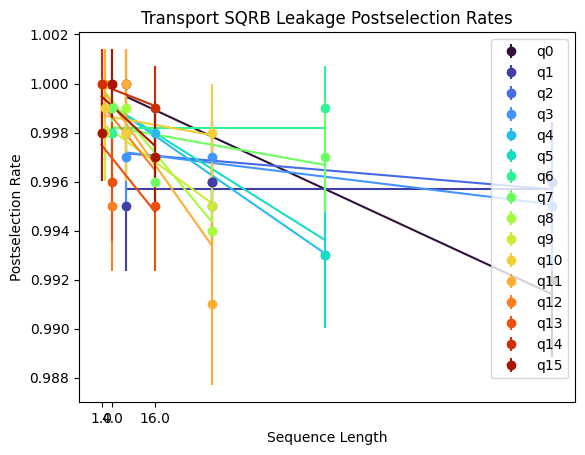

Qubit average leakge rates:
Transport Depth 1: 2.4e-05 +/- 9e-06
Transport Depth 2: 5.5e-05 +/- 1.8e-05
Transport Depth 4: 0.000129 +/- 4.4e-05
Transport Depth 8: 0.000138 +/- 8.6e-05


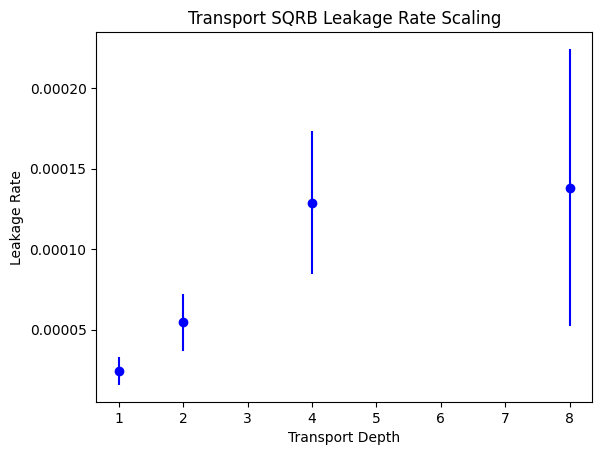

In [7]:
exp.analyze_results()

In [7]:
# save experiment object to working directory

exp.save()